Import Libraries

In [1]:
import random
import numpy as np
import tensorflow as tf
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


Set Seeds for Reproducibility

In [2]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)


Dataset Path and Parameters

In [3]:
# Dataset Path
dataset_dir = 'D:/4th semester/DMS_EL/Dataset'
train_dir = os.path.join(dataset_dir, 'Train')
validation_dir = os.path.join(dataset_dir, 'Validation')
test_dir = os.path.join(dataset_dir, 'Test')

# Image Parameters
img_size = 150
batch_size = 64


Image Data Generators

In [4]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Test Generator
test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1059 images belonging to 3 classes.
Found 12 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


Model Definition

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Compile and Train Model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=500,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/500


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.3742 - loss: 1.1280 - val_accuracy: 0.4167 - val_loss: 0.9442
Epoch 2/500
 1/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5000 - loss: 0.9069

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5000 - loss: 0.9069 - val_accuracy: 0.4167 - val_loss: 0.9004
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.6318 - loss: 0.7416 - val_accuracy: 0.8333 - val_loss: 0.5623
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6719 - loss: 0.6757 - val_accuracy: 0.7500 - val_loss: 0.5509
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.7761 - loss: 0.5487 - val_accuracy: 0.8333 - val_loss: 0.4473
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7656 - loss: 0.5302 - val_accuracy: 0.8333 - val_loss: 0.5789
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.8123 - loss: 0.4481 - val_accuracy: 0.8333 - val_loss: 0.4014
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8125 - loss: 0.4701 - val_accuracy: 0.8333 - val_loss: 0.3977
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.8879 - loss: 0.3100 - val_accuracy: 0.8333 - val_

Model Evaluation

In [8]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.9427 - loss: 0.3351
Test Accuracy: 94.53%


Visualize Performance

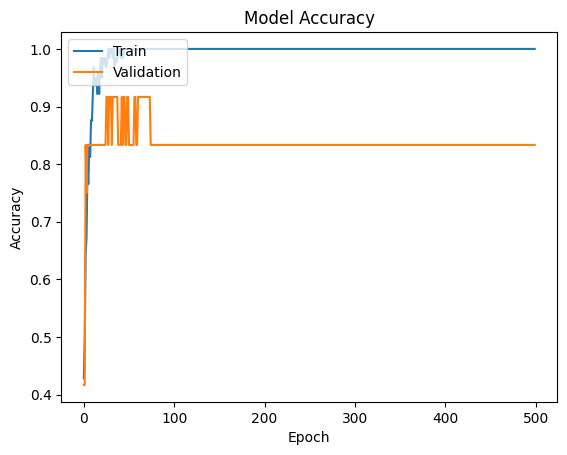

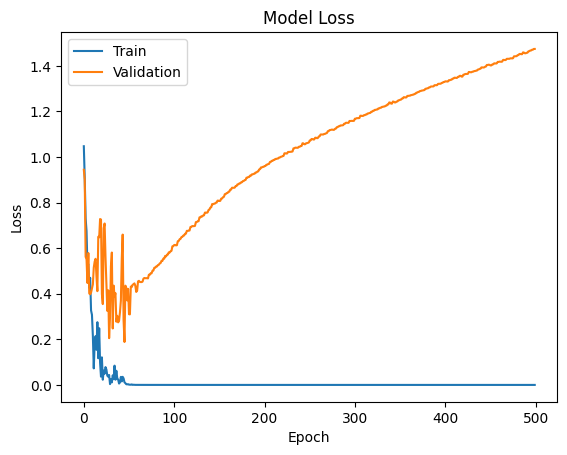

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Functions for Image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted Class Name: Rust


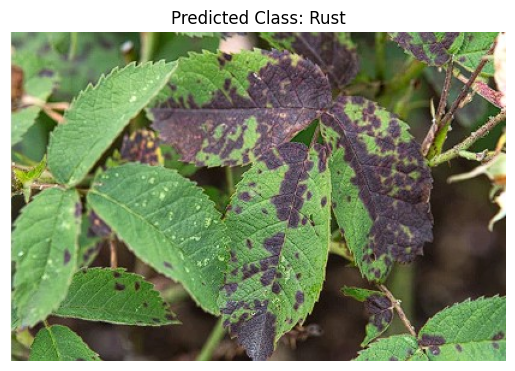

In [12]:
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

# Example usage
image_path = 'D:/4th semester/DMS_EL/Verification_Photos/8.jpg'  # Update this path to a test image
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()


Save the Model

In [13]:
model.save('plant_disease_prediction_model.h5')
